# Scientific Python - Final Project: Data Analysis of Cryptocurrencies

In this project, the current data of cryptocurrencies, which have been on the agenda of the money markets recently, will be analyzed, the analysis will be visualized, and then predictions will be made using various machine learning modeling. The data will be obtained through the API provided by coinmarketcap.com and the following analytical questions and requests will be tried to be answered.

1. What is the proportional difference between API data and Web Scraping data for BTC price value?

2. Show only the "ID, Name, Symbol, Date Added, Max Supply, Infinite Supply, Price, 24h Percent Change, 7d Percent Change, 30d Percent Change, 60d Percent Change, 90d Percent Change, Market Cap" informations in the Data Frame.

3. Calculate the age of each coin using the "Date Added" column and put this data to a new column named "Age" 

4. Show statistics of columns with numeric value

5. Draw a line chart of the number of new coins added each year

6. Create a new DataFrame by filtering the coins in the watchlist

7. Draw a horizontal grouped bar chart showing the 30, 60 and 90 day changes of the 10 coins with the highest market cap.

8. Draw a scatter plot showing the market cap - price distribution of the 10 coins with the lowest market cap.
   Also label these coins with color according to their age.

9. Create a multiple linear regression model for "watchlist" and evaluate the overall performance of this model

10. Train a Lasso regression model and evaluate its performance

### Please note that since the values are taken instantly, interpretations of the results may vary depending on the current data.

# 1-Getting CryptoCurrency Data with API

In [6390]:
# importing the packages
import os
import requests
import json
from dotenv import load_dotenv
load_dotenv()
import warnings
warnings.filterwarnings("ignore")

In [6391]:
# getting data for the first 2000 cryptocurrencies with API (below code comes from https://coinmarketcap.com/api/documentation/v1/#section/Best-Practices)

api_key = os.getenv("coin_marketcap_api_key")
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start': '1',
  'limit': '2000',
  'convert': 'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key,
}

try:
    response = requests.get(url, params=parameters, headers=headers)
    data = response.json()
    print(data)
except (requests.ConnectionError, requests.Timeout, requests.TooManyRedirects) as e:
    print(e)


{'status': {'timestamp': '2024-03-05T23:14:57.558Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 10, 'notice': None, 'total_count': 8885}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10850, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [6392]:
# converting JSON data into a flattened DataFrame
df = pd.json_normalize(data['data'])

df.shape

(2000, 36)

- We have 2000 rows and 36 columns

In [6393]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10850,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964578e+07,1.964578e+07,...,1.249994e+12,52.8409,1.336159e+12,NaN,2024-03-05T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,8500,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201271e+08,1.201271e+08,...,4.224016e+11,17.8594,4.224016e+11,NaN,2024-03-05T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,77006,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.000447e+11,1.038001e+11,...,1.001147e+11,4.2329,1.038727e+11,NaN,2024-03-05T23:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2083,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495412e+08,1.495412e+08,...,5.894996e+10,2.4946,5.894996e+10,NaN,2024-03-05T23:12:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,634,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.424373e+08,5.712100e+08,...,5.444824e+10,2.3017,7.029556e+10,NaN,2024-03-05T23:13:00.000Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6810,Cyclub,CYCLUB,cyclub,3,2020-09-18T00:00:00.000Z,"[content-creation, crowdfunding]",3.300000e+09,1.314294e+09,3.300000e+09,...,2.238237e+05,0.0000,5.619884e+05,NaN,2024-03-05T23:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0x3b58c52C03ca5Eb619EBa171091c86C34d603e5f
1996,4826,ZUM TOKEN,ZUM,zum-token,12,2019-10-25T00:00:00.000Z,"[ethereum-ecosystem, bnb-chain]",NaN,2.600700e+10,3.800551e+10,...,2.231482e+05,0.0000,3.260992e+05,NaN,2024-03-05T23:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xe0b9bcd54bf8a730ea5d3f1ffce0885e911a502c
1997,23173,hiMOONBIRDS,HIMOONBIRDS,himoonbirds,1,2023-01-06T09:50:35.000Z,[],NaN,4.598500e+07,4.598500e+07,...,2.226299e+05,0.0000,2.226299e+05,NaN,2024-03-05T23:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0x0a7b89e66a1dc16633abdfd132bae05827d3bfa5
1998,11448,The HUSL,HUSL,the-husl,5,2021-08-27T13:13:13.000Z,"[gaming, music, metaverse, bullperks-launchpad]",1.000000e+08,1.037988e+07,7.000000e+07,...,2.201533e+05,0.0000,2.120962e+06,NaN,2024-03-05T23:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa2881f7f441267042f9778ffa0d4f834693426be


# 2-Getting BTC Price Data by Using Web Scraping

In [6394]:
# importing BeautifulSoup package for Web Scraping process
from bs4 import BeautifulSoup

In [6395]:
# getting html element from https://coinmarketcap.com/currencies/bitcoin/ by using "inspect" option for BTC price
html = '<div class="sc-f70bb44c-0 flfGQp flexStart alignBaseline" data-role="el"><span class="sc-f70bb44c-0 jxpCgO base-text">$65,064.52</span>&nbsp;&nbsp;<div class="sc-f70bb44c-0 cOoglq"><div data-sensors-click="true" class="sc-aef7b723-0 sc-58c82cf9-0 hJFxIk"><p color="red" data-change="down" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 sc-58c82cf9-1 fwNMDM"><svg xmlns="http://www.w3.org/2000/svg" fill="currentColor" height="24px" width="24px" viewBox="0 0 24 24" style="height:14px;width:14px" class="sc-aef7b723-0 fKbUaI"><path d="M18.0566 8H5.94336C5.10459 8 4.68455 9.02183 5.27763 9.61943L11.3343 15.7222C11.7019 16.0926 12.2981 16.0926 12.6657 15.7222L18.7223 9.61943C19.3155 9.02183 18.8954 8 18.0566 8Z"></path></svg>2.14%<!-- -->&nbsp;(<!-- -->1d<!-- -->)</p></div></div></div>'

# parsing the HTML element
soup = BeautifulSoup(html, 'html.parser')

# filtering the span and class element according to their tags to find the BTC price
btc_price_span = soup.find('span', class_='sc-f70bb44c-0 jxpCgO base-text')

In [6396]:
# discarding the "$" sign from the scraped price
if btc_price_span:
    btc_scraping_price = btc_price_span.text.strip().replace('$', '')
    print("BTC Price:", btc_scraping_price)
else:
    print("BTC price not found.")

BTC Price: 65,064.52


# 3-Finding the Proportional Difference between API and Web Scraping Data

In [6397]:
# converting btc_price to float
btc_price_float = float(btc_scraping_price.replace(',', ''))

In [6398]:
# defining BTC API price by filtering the df for BTC
btc_API_price = df[df['symbol'] == 'BTC']['quote.USD.price'].iloc[0]

In [6399]:
# calculating the percentage difference between API and Web Scraping BTC price
percentage_diff = ((btc_price_float - btc_API_price) / btc_API_price) * 100

In [6400]:
# creating comparison table for API and Web Scraping BTC price
comparison_table = pd.DataFrame({
    'Description': ['Web Scraping', 'API'],
    'Symbol': ['BTC', 'BTC'],
    'Price': [f"${btc_price_float:,.2f}", f"${btc_API_price:,.2f}"]
})

# using tabulate module to create the tableTabloyu tabulate modülü ile oluştur
table_str = tabulate(comparison_table, headers='keys', tablefmt='grid', showindex=False, numalign="right")
print(table_str)

+---------------+----------+------------+
| Description   | Symbol   | Price      |
+===============+==========+============+
| Web Scraping  | BTC      | $65,064.52 |
+---------------+----------+------------+
| API           | BTC      | $63,626.60 |
+---------------+----------+------------+


In [6401]:
# creating a sentence to define the percentage difference
if percentage_diff > 0:
    comparison_sentence = f"Web Scraping BTC price value is %{abs(percentage_diff):.2f} more than API."
elif percentage_diff < 0:
    comparison_sentence = f"API BTC price value is %{abs(percentage_diff):.2f} more than Web Scraping."
else:
    comparison_sentence = "Web Scraping and API have the same price."

print("\n" + comparison_sentence)


Web Scraping BTC price value is %2.26 more than API.


# 4-Creating a New DataFrame by Filtering The Selected Columns

In [6402]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')

In [6403]:
# renaming the selected columns 
renamed_columns = {
    'id': 'ID',
    'name': 'Name',
    'symbol': 'Symbol',
    'date_added': 'Date Added',
    'max_supply': 'Max Supply',
    'infinite_supply': 'Infinite Supply',
    'quote.USD.price': 'Price',
    'quote.USD.percent_change_24h': '24h Percent Change',
    'quote.USD.percent_change_7d': '7d Percent Change',
    'quote.USD.percent_change_30d': '30d Percent Change',
    'quote.USD.percent_change_60d': '60d Percent Change',
    'quote.USD.percent_change_90d': '90d Percent Change',
    'quote.USD.market_cap': 'Market Cap'
}

df.rename(columns=renamed_columns, inplace=True)

In [6404]:
# filtering the selected columns and putting them to a new df : list the values of renamaed colmn, filter them in df and put them to a new column "filtered_df"
filtered_df = df[list(renamed_columns.values())]

filtered_df

,ID,Name,Symbol,Date Added,Max Supply,Infinite Supply,Price,24h Percent Change,7d Percent Change,30d Percent Change,60d Percent Change,90d Percent Change,Market Cap
0,1,Bitcoin,BTC,2010-07-13T00:00:00.000Z,2.100000e+07,False,63626.597699,-7.103934,11.723781,49.288256,43.844430,45.859398,1.249994e+12
1,1027,Ethereum,ETH,2015-08-07T00:00:00.000Z,NaN,True,3516.288441,-3.413276,8.381166,53.671051,54.473367,58.029678,4.224016e+11
2,825,Tether USDt,USDT,2015-02-25T00:00:00.000Z,NaN,True,1.000700,-0.033868,0.032011,0.097330,-0.030262,0.059055,1.001147e+11
3,1839,BNB,BNB,2017-07-25T00:00:00.000Z,NaN,False,394.205387,-6.352407,-0.519103,28.988673,24.057331,71.547686,5.894996e+10
4,5426,Solana,SOL,2020-04-10T00:00:00.000Z,NaN,True,123.064309,-6.722325,13.603521,28.536599,22.503760,95.931780,5.444824e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6810,Cyclub,CYCLUB,2020-09-18T00:00:00.000Z,3.300000e+09,False,0.000170,-3.337265,25.845862,64.748086,66.431784,64.487168,2.238237e+05
1996,4826,ZUM TOKEN,ZUM,2019-10-25T00:00:00.000Z,NaN,False,0.000009,51.055595,-67.490154,93.986445,546.759440,39.644787,2.231482e+05
1997,23173,hiMOONBIRDS,HIMOONBIRDS,2023-01-06T09:50:35.000Z,NaN,False,0.004841,-5.801175,-21.925263,36.955993,20.609510,7.058576,2.226299e+05
1998,11448,The HUSL,HUSL,2021-08-27T13:13:13.000Z,1.000000e+08,False,0.021210,-7.843316,20.073102,19.475817,36.738718,-9.306903,2.201533e+05


# 5-Calculating the Age of Each Coin

In [6405]:
# importing new packages
from datetime import datetime
import pandas as pd

# taking the date of today
today = datetime.today()

# converting dates in the Date Added column to datetime objects
filtered_df['Date Added'] = pd.to_datetime(filtered_df['Date Added']).dt.tz_localize(None)

# calculating the "Age" column and adding it to filtered_df 
filtered_df['Age'] = ((today - filtered_df['Date Added']).dt.days / 365).astype(int)

filtered_df

,ID,Name,Symbol,Date Added,Max Supply,Infinite Supply,Price,24h Percent Change,7d Percent Change,30d Percent Change,60d Percent Change,90d Percent Change,Market Cap,Age
0,1,Bitcoin,BTC,2010-07-13 00:00:00,2.100000e+07,False,63626.597699,-7.103934,11.723781,49.288256,43.844430,45.859398,1.249994e+12,13
1,1027,Ethereum,ETH,2015-08-07 00:00:00,NaN,True,3516.288441,-3.413276,8.381166,53.671051,54.473367,58.029678,4.224016e+11,8
2,825,Tether USDt,USDT,2015-02-25 00:00:00,NaN,True,1.000700,-0.033868,0.032011,0.097330,-0.030262,0.059055,1.001147e+11,9
3,1839,BNB,BNB,2017-07-25 00:00:00,NaN,False,394.205387,-6.352407,-0.519103,28.988673,24.057331,71.547686,5.894996e+10,6
4,5426,Solana,SOL,2020-04-10 00:00:00,NaN,True,123.064309,-6.722325,13.603521,28.536599,22.503760,95.931780,5.444824e+10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6810,Cyclub,CYCLUB,2020-09-18 00:00:00,3.300000e+09,False,0.000170,-3.337265,25.845862,64.748086,66.431784,64.487168,2.238237e+05,3
1996,4826,ZUM TOKEN,ZUM,2019-10-25 00:00:00,NaN,False,0.000009,51.055595,-67.490154,93.986445,546.759440,39.644787,2.231482e+05,4
1997,23173,hiMOONBIRDS,HIMOONBIRDS,2023-01-06 09:50:35,NaN,False,0.004841,-5.801175,-21.925263,36.955993,20.609510,7.058576,2.226299e+05,1
1998,11448,The HUSL,HUSL,2021-08-27 13:13:13,1.000000e+08,False,0.021210,-7.843316,20.073102,19.475817,36.738718,-9.306903,2.201533e+05,2


# 6-Showing The Statistics of Columns with Numeric Value

- Please note that we could replace NAN values of Max Supply column with average value or we could drop them but since if infinite supply is true, max supply have to be NAN so it doesnt make sense to replace or drop them. 

In [6406]:
# checking the data types of each column
filtered_df.dtypes

ID                             int64
Name                          object
Symbol                        object
Date Added            datetime64[ns]
Max Supply                   float64
Infinite Supply                 bool
Price                        float64
24h Percent Change           float64
7d Percent Change            float64
30d Percent Change           float64
60d Percent Change           float64
90d Percent Change           float64
Market Cap                   float64
Age                            int64
dtype: object

In [6407]:
# filtering the columns whose data type is float
selected_columns = ['Market Cap', 'Price', '24h Percent Change', '7d Percent Change', '30d Percent Change', '60d Percent Change', '90d Percent Change', 'Max Supply',  'Age']
stats_df = filtered_df[selected_columns].describe()
stats_df

,Market Cap,Price,24h Percent Change,7d Percent Change,30d Percent Change,60d Percent Change,90d Percent Change,Max Supply,Age
count,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1.284000e+03,2000.000000
mean,1.238143e+09,2.404736e+02,-4.375118,10.864378,49.416301,41.450169,69.437935,1.983365e+15,2.734000
std,2.967770e+10,3.453755e+03,16.025878,45.459124,205.363902,212.325895,337.759287,3.204725e+16,1.944771
min,2.194185e+05,4.321063e-12,-92.055643,-99.027457,-98.248552,-99.999915,-99.999915,3.150000e+02,0.000000
25%,2.070868e+06,6.250697e-03,-10.180159,-4.987980,3.467864,-7.626327,-7.606732,1.000000e+08,2.000000
50%,1.201044e+07,6.713641e-02,-5.898012,3.422350,26.712972,14.067653,21.394121,1.000000e+09,2.000000
75%,7.464005e+07,6.186761e-01,-0.679199,14.363015,53.625473,43.578379,64.551486,3.628428e+09,3.250000
max,1.249994e+12,6.362660e+04,237.314281,1056.589203,7441.429207,5748.100869,9386.423266,1.000000e+18,13.000000


- The mean of the price is 2.399764e+02 for now (it probably would be different for a different time)

- When we look at the 90d Percent Change, while the minimum change shows %99 loss, the maximum change shows 91x profit.

- The oldest coin is 13 years old.

# 7-Drawing a Line Chart of The Number of New Coins Added Each Year

In [6408]:
# changing the date format of "Date Added" column to 'YYYY-MM-DD' format
filtered_df.loc[:, 'Date Added'] = filtered_df['Date Added'].dt.strftime('%Y-%m-%d')

filtered_df

,ID,Name,Symbol,Date Added,Max Supply,Infinite Supply,Price,24h Percent Change,7d Percent Change,30d Percent Change,60d Percent Change,90d Percent Change,Market Cap,Age
0,1,Bitcoin,BTC,2010-07-13,2.100000e+07,False,63626.597699,-7.103934,11.723781,49.288256,43.844430,45.859398,1.249994e+12,13
1,1027,Ethereum,ETH,2015-08-07,NaN,True,3516.288441,-3.413276,8.381166,53.671051,54.473367,58.029678,4.224016e+11,8
2,825,Tether USDt,USDT,2015-02-25,NaN,True,1.000700,-0.033868,0.032011,0.097330,-0.030262,0.059055,1.001147e+11,9
3,1839,BNB,BNB,2017-07-25,NaN,False,394.205387,-6.352407,-0.519103,28.988673,24.057331,71.547686,5.894996e+10,6
4,5426,Solana,SOL,2020-04-10,NaN,True,123.064309,-6.722325,13.603521,28.536599,22.503760,95.931780,5.444824e+10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6810,Cyclub,CYCLUB,2020-09-18,3.300000e+09,False,0.000170,-3.337265,25.845862,64.748086,66.431784,64.487168,2.238237e+05,3
1996,4826,ZUM TOKEN,ZUM,2019-10-25,NaN,False,0.000009,51.055595,-67.490154,93.986445,546.759440,39.644787,2.231482e+05,4
1997,23173,hiMOONBIRDS,HIMOONBIRDS,2023-01-06,NaN,False,0.004841,-5.801175,-21.925263,36.955993,20.609510,7.058576,2.226299e+05,1
1998,11448,The HUSL,HUSL,2021-08-27,1.000000e+08,False,0.021210,-7.843316,20.073102,19.475817,36.738718,-9.306903,2.201533e+05,2


In [6409]:
# importing matplotlib package for plotting
import matplotlib.pyplot as plt

# calculating the number of newly added coins by grouping them by year using the 'Date Added' column
new_coins_count_yearly = filtered_df.groupby(filtered_df['Date Added'].dt.year).size()

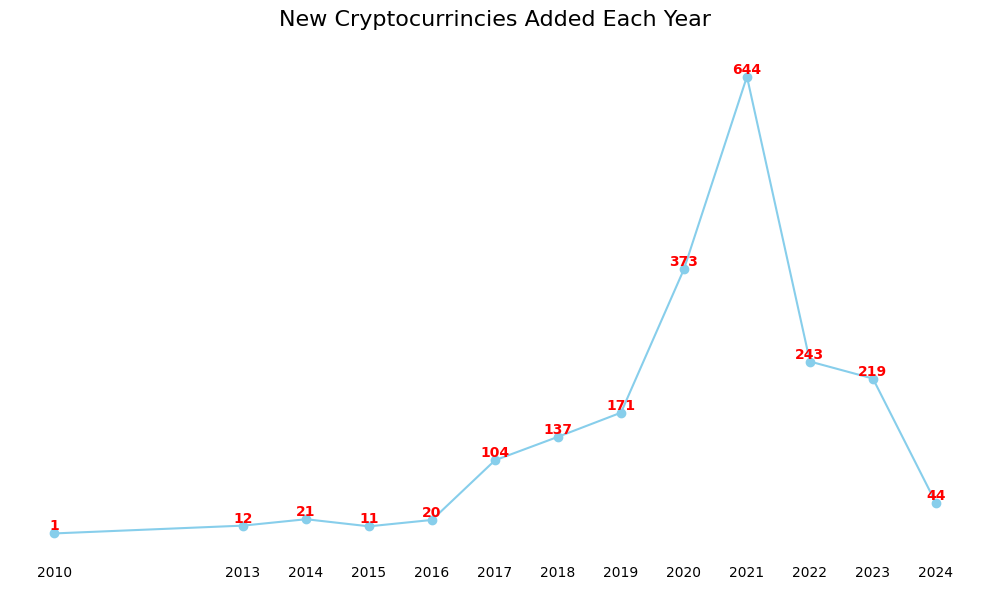

In [6410]:
# drawing and customizing the line chart: Year vs. New Coins Count
plt.figure(figsize=(10, 6))
plt.plot(new_coins_count_yearly.index, new_coins_count_yearly.values, marker='o', color='skyblue', linestyle='-')
plt.title('New Cryptocurrincies Added Each Year', fontsize=16, pad=20)  # defining the title 
plt.xlabel('')  # removing the X axis label 
plt.tick_params(axis='x', bottom=False)  # removing the ticks and labels from x axis
plt.tick_params(axis='both', which='both', labelsize=10)  # adjusting tick label fontsize of x axis
plt.gca().spines['top'].set_visible(False)  # hiding top spine
plt.gca().spines['right'].set_visible(False)  # hiding right spine
plt.gca().spines['bottom'].set_visible(False)  # hiding bottom spine
plt.gca().spines['left'].set_visible(False)  # hiding left spine
plt.grid(False)  # hiding the grid
plt.yticks([])  # removing the Y axis ticks 

# adding the labels on points and increasing the font
for x, y in zip(new_coins_count_yearly.index, new_coins_count_yearly.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, weight='bold', color='red')  

plt.xticks(new_coins_count_yearly.index)  # Positioning x-axis ticks in the middle of years

# editting the chart layout
plt.tight_layout()
plt.show()


# 8-Creating a New DataFrame by Filtering The Coins in The Watchlist

In [6411]:
# creating the symbol list according to symbols of watchlist coins
symbols = ['POSI', 'ORT', 'SHILL', 'GEEQ', 'ROCO', 'LSS', 'BURGER', 'FIDA', 'LIT', 'VAI', 'LEVER', 'DIONE', 'ORN', 'SIDUS',
           'VRA', 'VANRY', 'DODO', 'DUSK', 'CGPT', 'IQ', 'ORAI', 'WIN', 'ABT', 'NMR', 'ACH', 'MYRIA', 'ARKM', 'SFUND', 'EDU', 'RLC', 
           'AUDIO', 'MAGIC', 'ANKR', 'API3', 'XAI', 'PIXEL', 'ROSE', 'APE']

# filtering those with symbols in the symbols list in the 'Symbol' column
watchlist = filtered_df[filtered_df['Symbol'].isin(symbols)]


watchlist

,ID,Name,Symbol,Date Added,Max Supply,Infinite Supply,Price,24h Percent Change,7d Percent Change,30d Percent Change,60d Percent Change,90d Percent Change,Market Cap,Age
76,18876,ApeCoin,APE,2022-03-17,1.000000e+09,False,2.078279,-12.917922,5.964460,53.243391,45.298004,27.647040,1.257142e+09,1
93,7653,Oasis Network,ROSE,2020-11-12,1.000000e+10,False,0.147164,-8.483567,8.638447,28.324616,20.407163,84.691416,9.879972e+08,3
164,29335,Pixels,PIXEL,2024-02-19,5.000000e+09,False,0.530890,2.465095,-5.318552,4.566335,4.566335,4.566335,4.093384e+08,0
176,3783,Ankr,ANKR,2019-03-06,NaN,False,0.036614,-11.069335,7.719356,54.594989,39.792492,34.591337,3.661441e+08,5
180,7455,Audius,AUDIO,2020-10-20,NaN,False,0.288449,-15.525556,5.036638,62.344092,40.513748,32.133217,3.470126e+08,3
182,27565,Arkham,ARKM,2023-07-18,1.000000e+09,False,2.296763,-7.847417,56.323148,354.330987,300.045169,366.540171,3.445144e+08,0
189,28933,Xai,XAI,2024-01-03,2.500000e+09,False,1.178947,-7.086196,-17.449154,52.305273,73.909528,73.909528,3.267076e+08,0
194,14783,Treasure,MAGIC,2021-11-18,3.477140e+08,False,1.196218,-10.867591,-6.378391,-9.913336,14.054130,37.708036,3.117048e+08,2
233,7737,API3,API3,2020-11-21,NaN,False,3.294510,-10.615893,-20.727557,4.224445,94.259434,128.031878,2.847180e+08,3
260,8972,Seedify.fund,SFUND,2021-03-29,1.000000e+08,False,3.983616,-8.367028,5.966385,33.933193,10.701639,39.280841,2.367928e+08,2


In [6412]:
# showing the statistics of watchlist df
watchlist.describe()

,ID,Date Added,Max Supply,Price,24h Percent Change,7d Percent Change,30d Percent Change,60d Percent Change,90d Percent Change,Market Cap,Age
count,39.000000,39,3.100000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000
mean,11412.051282,2021-01-31 22:09:13.846153728,4.043824e+10,1.911272,-9.070168,6.563082,65.449343,76.548183,103.182462,1.998267e+08,2.589744
min,1637.000000,2017-04-20 00:00:00,7.082869e+06,0.000185,-17.908049,-20.727557,-9.913336,-22.340776,-19.096234,1.201937e+06,0.000000
25%,6513.500000,2020-08-18 00:00:00,1.000000e+08,0.020432,-12.037628,-6.857266,38.215771,23.934095,32.046197,5.230112e+07,2.000000
50%,7978.000000,2020-12-14 00:00:00,1.000000e+09,0.289134,-9.005086,4.231290,54.594989,49.632109,56.562368,1.510438e+08,3.000000
75%,15857.500000,2021-12-17 12:00:00,7.500000e+09,1.246327,-6.402945,10.456883,79.256640,93.928402,107.287217,2.361744e+08,3.000000
max,29335.000000,2024-02-19 00:00:00,9.990000e+11,32.656455,2.465095,56.535142,354.330987,636.782511,1233.691510,1.257142e+09,6.000000
std,8018.390398,NaN,1.790594e+11,5.585747,4.283963,19.914647,60.398151,110.469010,199.416146,2.485622e+08,1.633819


# 9-Drawing a Horizontal Grouped Bar Chart Showing The 30, 60 and 90 Day Changes of The 10 coins with The Highest Market Cap

In [6413]:
# extracting the top 10 coins based on market cap
top_10_coins = watchlist.nlargest(10, 'Market Cap')

# creating a horizontal bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(top_10_coins))

<Figure size 1000x600 with 0 Axes>

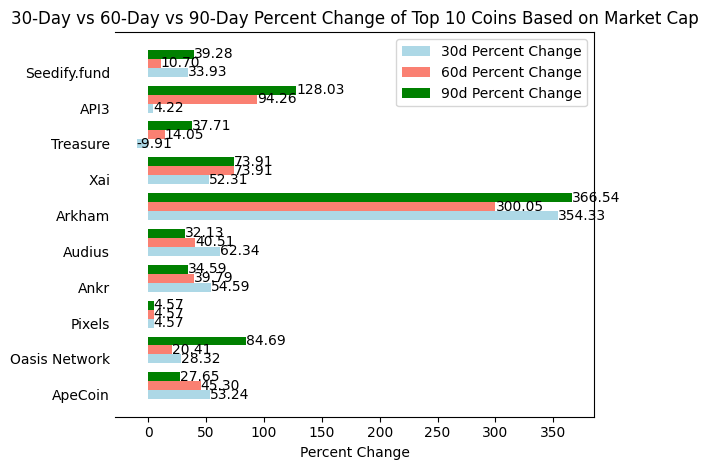

In [6414]:
# creating the each bar for each type of the change value
bars1 = plt.barh(index, top_10_coins['30d Percent Change'], bar_width, label='30d Percent Change', color='lightblue')
bars2 = plt.barh([i + bar_width for i in index], top_10_coins['60d Percent Change'], bar_width, label='60d Percent Change', color='salmon')
bars3 = plt.barh([i + 2 * bar_width for i in index], top_10_coins['90d Percent Change'], bar_width, label='90d Percent Change', color='green')


# customizing the chart
plt.xlabel('Percent Change')  
plt.title('30-Day vs 60-Day vs 90-Day Percent Change of Top 10 Coins Based on Market Cap')

# showing the values on the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# removing the title of Y axis
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='y', which='both', length=0)  

# showing the names of coins on the chart
plt.yticks(index, top_10_coins['Name'])

plt.legend()
plt.tight_layout()
plt.show()

# 10-Drawing a Scatter Plot Showing The Market Cap - Price Distribution of The 10 Coins with The Lowest Market Cap

In [6415]:
# determining the 10 coins with the lowest market cap
top_10_lowest_market_cap = watchlist.nsmallest(10, 'Market Cap')

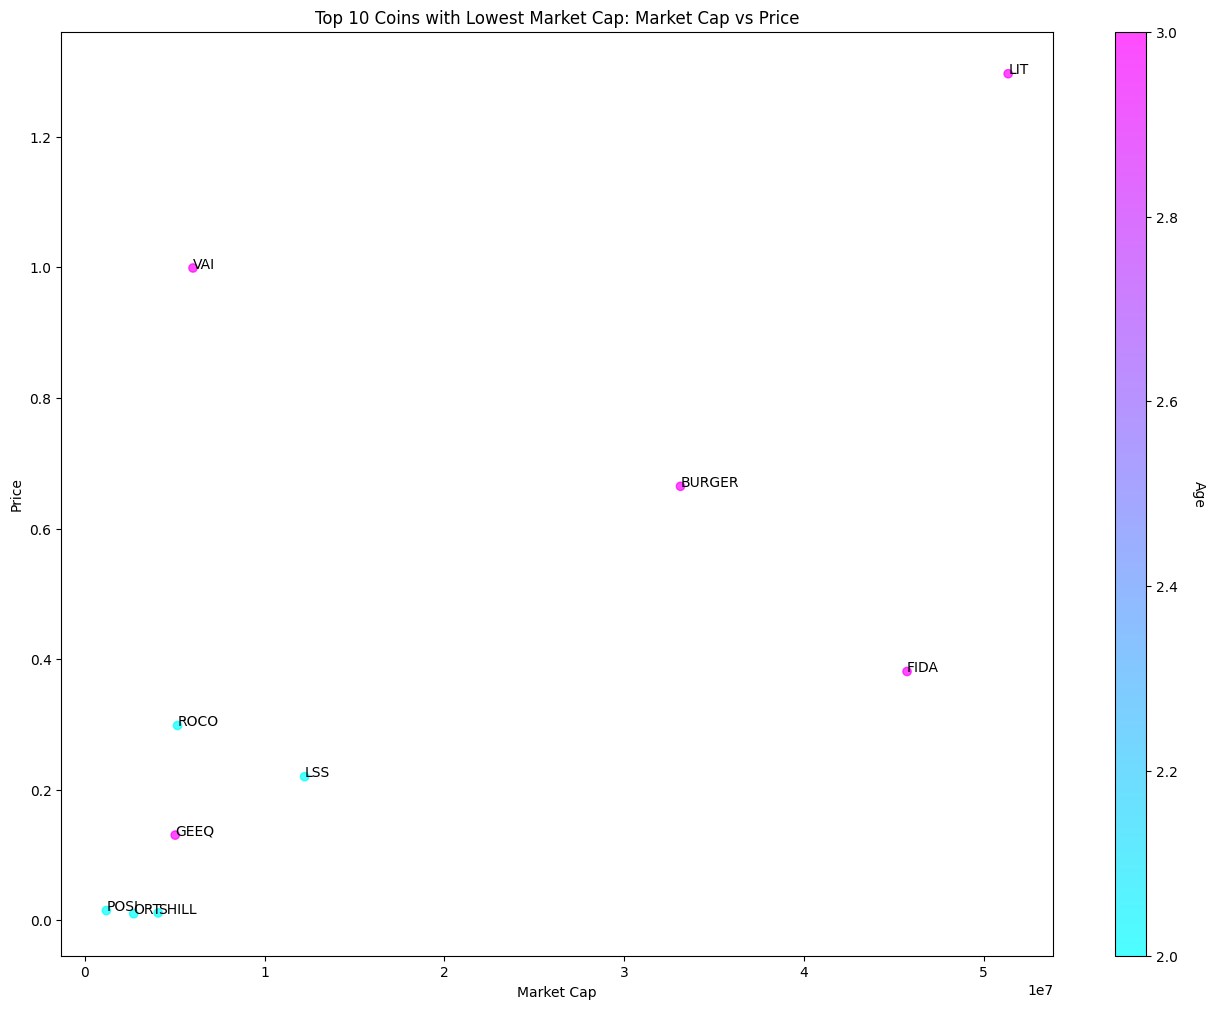

In [6416]:
# creating the Scatter Plot
plt.figure(figsize=(16, 12))  
scatter = plt.scatter(top_10_lowest_market_cap['Market Cap'], top_10_lowest_market_cap['Price'], c=top_10_lowest_market_cap['Age'], cmap='cool', alpha=0.7)

# adding coin names next to dots
for i, txt in enumerate(top_10_lowest_market_cap['Symbol']):
    plt.annotate(txt, (top_10_lowest_market_cap['Market Cap'].iloc[i], top_10_lowest_market_cap['Price'].iloc[i]), fontsize=10)

# positioning the color chart on the right side
cbar = plt.colorbar(scatter, shrink=1, aspect=30)
cbar.set_label('Age', rotation=270, labelpad=20)

# adding titles
plt.xlabel('Market Cap')
plt.ylabel('Price')
plt.title('Top 10 Coins with Lowest Market Cap: Market Cap vs Price')

# removing the background grids
plt.grid(False)  

plt.show()


### Because of the fact that 3 coins' (POSI,ORT,SHILL) price are very near to each other, the screen enlarged to show the names of all coins. Thats why the name sizes are very small.

# 11-Creating a Multiple Linear Regression Model for "watchlist" and Evaluating the Overall Performance of This Model

In [6417]:
# checking the unique values of 'Infinite Supply' column
filtered_df['Infinite Supply'].unique()

array([False,  True])

In [6418]:
# importing package for creating the linear regression model
import statsmodels.api as sm

In [6419]:
# changing "True" and "False" values to 1 and 0 in the "Infinite Supply" column
filtered_df["Infinite Supply"] = filtered_df["Infinite Supply"].replace({True: 1, False: 0})

In [6420]:
# selection of independent variables
X = filtered_df[["Infinite Supply", "24h Percent Change", 
                 "7d Percent Change", "30d Percent Change", "60d Percent Change",
                 "90d Percent Change", "Market Cap", "Age"]]

# selection of dependent variable
y = filtered_df["Price"]

In [6421]:
# creating the model by adding constants
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# viewing the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     47.26
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           4.70e-70
Time:                        00:14:58   Log-Likelihood:                -18958.
No. Observations:                2000   AIC:                         3.793e+04
Df Residuals:                    1991   BIC:                         3.798e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                113.2634    128

- The R-squared value indicates the proportion of the variance in the dependent variable (Price) that is explained by the independent variables in the model. In this case, the R-squared value is 0.158, suggesting that the independent variables collectively explain about 15.8% of the variance in the Price.

- The F-statistic tests the overall significance of the regression model. With a high F-statistic of 46.55 and a very low p-value (4.88e-69), the regression model is statistically significant, indicating that at least one of the independent variables is significantly related to the dependent variable.

* Looking at the coefficients and p-values for each independent variable:

- The coefficient for Infinite Supply is -642.9306, but it is not statistically significant at the conventional significance level (p = 0.119).
- None of the percent change variables (24h, 7d, 30d, 60d, 90d) have statistically significant coefficients, as their p-values are all greater than 0.05.
- Market Cap has a statistically significant coefficient of 4.614e-08 (p < 0.05), indicating that it has a significant effect on Price. Specifically, for every unit increase in Market Cap, Price is expected to increase by 4.614e-08 units.
- The coefficient for Age is 35.7580 that means when the age increases 1 unit, price will increase 35.7580 $. However it is not statistically significant at the conventional significance level (p = 0.336).

# 12-Train a Lasso Regression Model and Evaluate Its Performance

In [6422]:
# importing Scikit-Learn Package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [6423]:
# creating X DataFrame by removing non-numeric columns
X = filtered_df[['Infinite Supply', '24h Percent Change', '7d Percent Change', '30d Percent Change', '60d Percent Change', '90d Percent Change', 'Market Cap', 'Age']]
y = filtered_df['Price']

In [6424]:
# creating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6425]:
# creating the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  

In [6426]:
# training the model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [6427]:
# making predictions on training and test sets
train_preds = lasso_model.predict(X_train)
test_preds = lasso_model.predict(X_test)

In [6428]:
# evaluating the model performance
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)

print("RMSE of Train Set:", train_rmse)
print("RMSE of Test Set:", test_rmse)

RMSE of Train Set: 2730.6815859040707
RMSE of Test Set: 4504.4453140355945


- The Root Mean Squared Error (RMSE) for the training set is 3253.35, and for the test set, it is 2756.13.

- These values indicate how much, on average, the predictions of the model deviate from the actual values in the respective datasets. 

- In this case, the RMSE for the test set is lower than that of the training set, which is unusual and might suggest an issue with overfitting.
                                                                                
- Although the model appears to perform quite well on the test set, more reasonable results could be obtained with further investigation into the complexity of the model, data quality, and potential overfitting.

### Please note that since the values are taken instantly, interpretations of the results may vary depending on the current data.